In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import functools as ft
import pandas as pd
import numpy as np
import re
    

In [2]:


r = requests.get("https://logicalharmony.net/cruelty-free-brands-at-beauty-bay/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
cf_brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='entry-content')
for brand in brand_section1.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    cf_brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(cf_brands)


40

In [3]:
print(cf_brands)

['Anastasia Beverly Hills', 'Ardell', 'Bdellium Tools', 'beautyblender', 'Beauty Chef, The', 'Blinc', 'Coloured Raine (list of\xa0Coloured Raine vegan products)', 'Cover FX – 100% vegan', 'Dose of Colors', 'Eye of Horus', 'Festival Face', 'Frank Body (list of Frank Body vegan products)', 'Gerard Cosmetics', 'House of Lashes', 'Jeffree Star Cosmetics – 100% vegan', 'Jordana', 'Jouer Cosmetics (list of\xa0Jouer Cosmetics vegan products)', 'Kitsch', 'Linda Hallberg Cosmetics', 'Luxie Beauty – 100% vegan', 'Makeup Geek', 'Mario Badescu', 'Melt Cosmetics', 'Milani (list of Milani vegan products)', 'Nabla', 'Nanshy – 100% vegan', 'NuMe', 'OFRA Cosmetics – 100% vegan', 'Ordinary, The', 'PUR Cosmetics (list of PUR Cosmetics vegan products)', 'RCMA', 'RMS Beauty', 'Sigma Beauty', 'Stila', 'Sugarpill', 'T3', 'theBalm (The Balm)', 'Yes To', 'Z Palette', 'Zoeva']


In [4]:
# create dataframe - start with just brands list, then adjust
cruelty_free_beautybay_df = pd.DataFrame({'Brand_info': cf_brands})   
cruelty_free_beautybay_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_beautybay.csv', index=False)
cruelty_free_beautybay_df.head(40)

,Brand_info
0,Anastasia Beverly Hills
1,Ardell
2,Bdellium Tools
3,beautyblender
4,"Beauty Chef, The"
5,Blinc
6,Coloured Raine (list of Coloured Raine vegan p...
7,Cover FX – 100% vegan
8,Dose of Colors
9,Eye of Horus


In [5]:
# create a new column that tells whether or not a product is vegan
# create dataframe - start with just brands list, then adjust
cruelty_free_beautybay_df['All_vegan'] = cruelty_free_beautybay_df['Brand_info'].str.contains('100% vegan')
cruelty_free_beautybay_df['Partial_vegan'] = cruelty_free_beautybay_df['Brand_info'].str.contains('vegan product', case=False)

In [6]:
print(cruelty_free_beautybay_df.All_vegan.sum())
print(cruelty_free_beautybay_df.Partial_vegan.sum())
cruelty_free_beautybay_df.head(40)

5
5


,Brand_info,All_vegan,Partial_vegan
0,Anastasia Beverly Hills,False,False
1,Ardell,False,False
2,Bdellium Tools,False,False
3,beautyblender,False,False
4,"Beauty Chef, The",False,False
5,Blinc,False,False
6,Coloured Raine (list of Coloured Raine vegan p...,False,True
7,Cover FX – 100% vegan,True,False
8,Dose of Colors,False,False
9,Eye of Horus,False,False


In [7]:
cruelty_free_beautybay_df['Brand_info'].str.contains('parent company').sum()

0

In [8]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
cruelty_free_beautybay_df['Bad_parent_company'] = cruelty_free_beautybay_df['Brand_info'].str.contains('parent company', case=False)

In [9]:
cruelty_free_only = cruelty_free_beautybay_df[(cruelty_free_beautybay_df['All_vegan'] == False) & (cruelty_free_beautybay_df['Partial_vegan'] == False) & (cruelty_free_beautybay_df['Bad_parent_company'] == False)]
num_cruelty_free = len(cruelty_free_only)
print(f"Number of brands that are just cruelty-free: {num_cruelty_free}")

Number of brands that are just cruelty-free: 30


In [10]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
cruelty_free_beautybay_df['Bad_parent_company'] = cruelty_free_beautybay_df['Brand_info'].str.contains('Parent company', case=False)

In [11]:
cruelty_free_beautybay_df.head(30)

,Brand_info,All_vegan,Partial_vegan,Bad_parent_company
0,Anastasia Beverly Hills,False,False,False
1,Ardell,False,False,False
2,Bdellium Tools,False,False,False
3,beautyblender,False,False,False
4,"Beauty Chef, The",False,False,False
5,Blinc,False,False,False
6,Coloured Raine (list of Coloured Raine vegan p...,False,True,False
7,Cover FX – 100% vegan,True,False,False
8,Dose of Colors,False,False,False
9,Eye of Horus,False,False,False


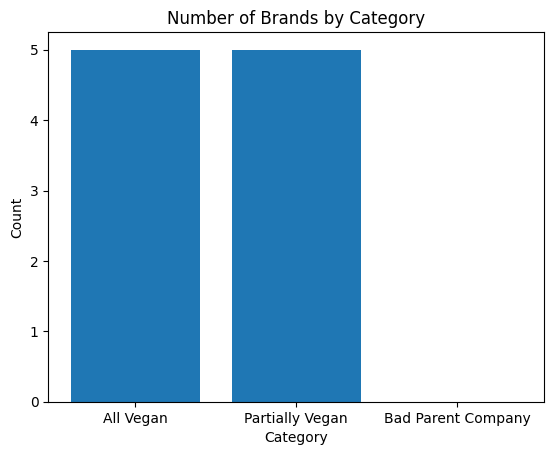

In [12]:
# count the number of brands in each category
all_vegan_count = cruelty_free_beautybay_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_beautybay_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_beautybay_df['Bad_parent_company'].sum()

# create a bar plot of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count]
plt.bar(labels, counts)
plt.title('Number of Brands by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

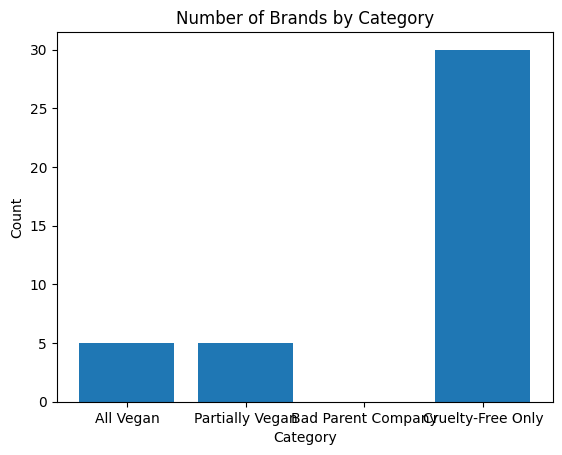

In [13]:
# count the number of brands in each category
all_vegan_count = cruelty_free_beautybay_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_beautybay_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_beautybay_df['Bad_parent_company'].sum()
cruelty_free_count = len(cruelty_free_only)

# create a bar plot of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company', 'Cruelty-Free Only']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count, cruelty_free_count]
plt.bar(labels, counts)
plt.title('Number of Brands by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

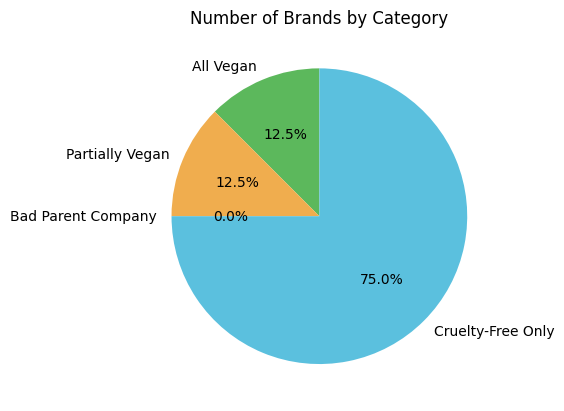

In [14]:
# count the number of brands in each category
all_vegan_count = cruelty_free_beautybay_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_beautybay_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_beautybay_df['Bad_parent_company'].sum()
cruelty_free_count = len(cruelty_free_only)

# create a pie chart of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company', 'Cruelty-Free Only']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count, cruelty_free_count]
colors = ['#5cb85c', '#f0ad4e', '#d9534f', '#5bc0de']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Number of Brands by Category')
plt.show()


In [15]:
import requests
from bs4 import BeautifulSoup



html = """<div class="desktop-menu-content__column brand-search-column"><div class="brand-section" data-dcy-id="0.11045320738189801"><h3 class="brand-section-header brand-section-header-A " data-dcy-id="0.8148887360067318"><div>A</div></h3><div class="brand-section-items" data-dcy-id="0.9924091310762935"><a class="brand-item" href="/l/aboutface/" data-dcy-id="0.6767911628438008">about-face</a><a class="brand-item" href="/l/acnemy/" data-dcy-id="0.061105212726115354">Acnemy</a><a class="brand-item" href="/l/aesop/" data-dcy-id="0.4520486354687401">Aēsop</a><a class="brand-item" href="/l/alliesofskin/" data-dcy-id="0.9449564547307951">Allies of Skin</a><a class="brand-item" href="/l/anastasiabeverlyhills/" data-dcy-id="0.24801460173917556">Anastasia Beverly Hills</a><a class="brand-item" href="/l/arianagrande/" data-dcy-id="0.8884289749439107">Ariana Grande</a><a class="brand-item" href="/l/asiam/" data-dcy-id="0.15832675606642876">As I Am</a><a class="brand-item" href="/l/asani/" data-dcy-id="0.29338693859529275">Aśani</a><a class="brand-item" href="/l/aureliaprobioticskincare/" data-dcy-id="0.6767699537447651">Aurelia London</a><a class="brand-item" href="/l/avene/" data-dcy-id="0.6348226136770929">Avène</a></div></div><div class="brand-section" data-dcy-id="0.5186731591493423"><h3 class="brand-section-header brand-section-header-B " data-dcy-id="0.005838978638118997"><div>B</div></h3><div class="brand-section-items" data-dcy-id="0.16342831273784375"><a class="brand-item" href="/l/babeoriginal/" data-dcy-id="0.16123391338398663">Babe Original</a><a class="brand-item" href="/l/babyliss/" data-dcy-id="0.23333704783207754">BaByliss</a><a class="brand-item" href="/l/babylisspro/" data-dcy-id="0.48382100959863306">Babyliss Pro</a><a class="brand-item" href="/l/bala/">Bala</a><a class="brand-item" href="/l/barebyvogue/" data-dcy-id="0.25995960808985075">Bare By Vogue</a><a class="brand-item" href="/l/beautycooler/">Beauty Cooler</a><a class="brand-item" href="/l/beautyworks/" data-dcy-id="0.9400465312386033">Beauty Works</a><a class="brand-item" href="/l/beautyblender/" data-dcy-id="0.995580044819756">beautyblender</a><a class="brand-item" href="/l/bedofnails/">Bed of Nails</a><a class="brand-item" href="/l/bellissima/">Bellissima</a><a class="brand-item" href="/l/beyou/">BeYou</a><a class="brand-item" href="/l/bhcosmetics/">BH Cosmetics</a><a class="brand-item" href="/l/bleachlondon/">Bleach London</a><a class="brand-item" href="/l/bliss/">Bliss</a><a class="brand-item" href="/l/bondisands/">Bondi Sands</a><a class="brand-item" href="/l/bperfect/">bPerfect</a><a class="brand-item" href="/l/briogeo/">Briogeo</a><a class="brand-item" href="/l/brushcandy/">Brush Candy</a><a class="brand-item" href="/l/brushworks/">Brushworks</a><a class="brand-item" href="/l/bubbleskincare/">Bubble Skincare</a><a class="brand-item" href="/l/bumblebumble/">Bumble and bumble</a><a class="brand-item" href="/l/beautybay/">By BEAUTY BAY</a><a class="brand-item" href="/l/bywishtrend/">By Wishtrend</a><a class="brand-item" href="/l/thebeautycrop/">The Beauty Crop</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-C "><div>C</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/candycoat/">Candy Coat</a><a class="brand-item" href="/l/cantu/">Cantu</a><a class="brand-item" href="/l/carbontheory/">Carbon Theory</a><a class="brand-item" href="/l/cerave/">CeraVe</a><a class="brand-item" href="/l/cinemasecrets/">Cinema Secrets</a><a class="brand-item" href="/l/clinique/">Clinique</a><a class="brand-item" href="/l/cloudnine/">CLOUD NINE</a><a class="brand-item" href="/l/cocoeve/">Coco &amp; Eve</a><a class="brand-item" href="/l/cococosmeticsbychloe/">Coco Cosmetics By Chloe</a><a class="brand-item" href="/l/contourcube/">Contour Cube®</a><a class="brand-item" href="/l/cosrx/">COSRX</a><a class="brand-item" href="/l/coverfx/">Cover FX</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-D "><div>D</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/djvmiaray/">d.j.v. Miaray</a><a class="brand-item" href="/l/danessamyricksbeauty/">Danessa Myricks Beauty</a><a class="brand-item" href="/l/davines/">Davines</a><a class="brand-item" href="/l/dawsylicious/">Dawsylicious</a><a class="brand-item" href="/l/dearklairs/">Dear, Klairs</a><a class="brand-item" href="/l/deodoc/">DeoDoc</a><a class="brand-item" href="/l/dermadoctor/">DERMAdoctor</a><a class="brand-item" href="/l/dermalogica/">Dermalogica</a><a class="brand-item" href="/l/designme/">DesignME</a><a class="brand-item" href="/l/dollbeauty/">Doll Beauty</a><a class="brand-item" href="/l/doseco/">Dose &amp; Co</a><a class="brand-item" href="/l/drdennisgross/">Dr. Dennis Gross</a><a class="brand-item" href="/l/drjart/">Dr. Jart+</a><a class="brand-item" href="/l/drpawpaw/">Dr. PAWPAW</a><a class="brand-item" href="/l/dragunbeauty/">Dragun Beauty</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-E "><div>E</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/elfcosmetics/">e.l.f. Cosmetics</a><a class="brand-item" href="/l/egyptianmagic/">Egyptian Magic</a><a class="brand-item" href="/l/embryolisse/">Embryolisse</a><a class="brand-item" href="/l/esho/">ESHO.</a><a class="brand-item" href="/l/essie/">Essie</a><a class="brand-item" href="/l/esteelauder/">Estée Lauder</a><a class="brand-item" href="/l/everydayhumans/">Everyday Humans</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-F "><div>F</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/faace/">Faace</a><a class="brand-item" href="/l/fablemane/">Fable &amp; Mane</a><a class="brand-item" href="/l/floralstreet/">Floral Street</a><a class="brand-item" href="/l/florencebymills/">florence by mills</a><a class="brand-item" href="/l/foreo/">Foreo</a><a class="brand-item" href="/l/freck/">Freck</a><a class="brand-item" href="/l/fudgeprofessional/">Fudge Professional</a><a class="brand-item" href="/l/fur/">Fur</a><a class="brand-item" href="/l/thefoxtan/">The Fox Tan</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-G "><div>G</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/ghost/">Ghost</a><a class="brand-item" href="/l/glistencosmetics/">Glisten Cosmetics</a><a class="brand-item" href="/l/glowforit/">Glow For It</a><a class="brand-item" href="/l/glowhub/">Glow Hub</a><a class="brand-item" href="/l/gooddyeyoung/">Good Dye Young</a><a class="brand-item" href="/l/grays/">grays.</a><a class="brand-item" href="/l/growthbomb/">Growth Bomb</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-H "><div>H</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/hairsyrup/">Hair Syrup</a><a class="brand-item" href="/l/hairburst/">Hairburst</a><a class="brand-item" href="/l/hairtamin/">HAIRtamin</a><a class="brand-item" href="/l/hairvest/">Hairvest</a><a class="brand-item" href="/l/halfmagic/">HALF MAGIC</a><a class="brand-item" href="/l/hankhenry/">Hank &amp; Henry</a><a class="brand-item" href="/l/hellosunday/">Hello Sunday</a><a class="brand-item" href="/l/herbivore/">Herbivore</a><a class="brand-item" href="/l/highereducationskincare/">Higher Education Skincare</a><a class="brand-item" href="/l/higherdose/">HigherDOSE</a><a class="brand-item" href="/l/hindash/">Hindash</a><a class="brand-item" href="/l/holikaholika/">Holika Holika</a><a class="brand-item" href="/l/humnutrition/">HUM Nutrition</a><a class="brand-item" href="/l/hur/">hur.</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-I "><div>I</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/idewcare/">I Dew Care</a><a class="brand-item" href="/l/imfrom/">I'm From</a><a class="brand-item" href="/l/iconiclondon/">ICONIC London</a><a class="brand-item" href="/l/ilios-lighting/">Ilios Lighting</a><a class="brand-item" href="/l/inglotcosmetics/">INGLOT Cosmetics</a><a class="brand-item" href="/l/inkedbydani/">INKED by Dani</a><a class="brand-item" href="/l/isleofparadise/">Isle Of Paradise</a><a class="brand-item" href="/l/isoclean/">ISOCLEAN</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-J "><div>J</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/jamaicanmangolime/">Jamaican Mango &amp; Lime</a><a class="brand-item" href="/l/jasonwubeauty/">Jason Wu Beauty</a><a class="brand-item" href="/l/jeffreestarcosmetics/">Jeffree Star Cosmetics</a><a class="brand-item" href="/l/jenniferlopez/">Jennifer Lopez</a><a class="brand-item" href="/l/joshwoodcolour/">Josh Wood Colour</a><a class="brand-item" href="/l/jouercosmetics/">Jouer Cosmetics</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-K "><div>K</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/k18hair/">K18 Hair</a><a class="brand-item" href="/l/kashbeauty/">KASH Beauty</a><a class="brand-item" href="/l/keracare/">KeraCare</a><a class="brand-item" href="/l/kevynaucoin/">Kevyn Aucoin</a><a class="brand-item" href="/l/kikihealth/">KIKI Health</a><a class="brand-item" href="/l/kimchichicbeauty/">KimChi Chic Beauty</a><a class="brand-item" href="/l/kitsch/">Kitsch</a><a class="brand-item" href="/l/koparibeauty/">Kopari Beauty</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-L "><div>L</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/lagirl/">L.A. Girl</a><a class="brand-item" href="/l/laboratoryperfumes/">Laboratory Perfumes</a><a class="brand-item" href="/l/laneige/">Laneige</a><a class="brand-item" href="/l/lastobject/">LastObject</a><a class="brand-item" href="/l/lelo/">Lelo</a><a class="brand-item" href="/l/lessecretsdeloly/">Les Secrets De Loly</a><a class="brand-item" href="/l/lethalcosmetics/">Lethal Cosmetics</a><a class="brand-item" href="/l/lindahallberg/">LH Cosmetics</a><a class="brand-item" href="/l/lillylashes/">Lilly Lashes</a><a class="brand-item" href="/l/lolaslashes/">Lola's Lashes</a><a class="brand-item" href="/l/lorac/">LORAC</a><a class="brand-item" href="/l/lovingtan/">Loving Tan</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-M "><div>M</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/maccosmetics/">MAC Cosmetics</a><a class="brand-item" href="/l/madebymitchell/">Made By Mitchell</a><a class="brand-item" href="/l/maisonmatine/">Maison Matine</a><a class="brand-item" href="/l/makeupfridge/">Makeup Fridge</a><a class="brand-item" href="/l/makeuprevolution/">Makeup Revolution</a><a class="brand-item" href="/l/manentail/">Mane 'n Tail</a><a class="brand-item" href="/l/mariobadescu/">Mario Badescu</a><a class="brand-item" href="/l/martinecosmetics/">Martine Cosmetics</a><a class="brand-item" href="/l/maude/">Maude</a><a class="brand-item" href="/l/maybelline/">Maybelline</a><a class="brand-item" href="/l/megababe/">Megababe</a><a class="brand-item" href="/l/mehron/">Mehron</a><a class="brand-item" href="/l/meltcosmetics/">Melt Cosmetics</a><a class="brand-item" href="/l/mermadehair/">Mermade Hair</a><a class="brand-item" href="/l/mielleorganics/">Mielle Organics</a><a class="brand-item" href="/l/mijmasks/">MIJ Masks</a><a class="brand-item" href="/l/milani/">Milani</a><a class="brand-item" href="/l/minetan/">Mine Tan</a><a class="brand-item" href="/l/mondayhaircare/">MONDAY Haircare</a><a class="brand-item" href="/l/moonjuice/">Moon Juice</a><a class="brand-item" href="/l/moyoulondon/">MoYou London</a><a class="brand-item" href="/l/myviv/">My VIV</a><a class="brand-item" href="/l/mylee/">Mylee</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-N "><div>N</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/nabla/">NABLA</a><a class="brand-item" href="/l/nakedsundays/">Naked Sundays</a><a class="brand-item" href="/l/nanshy/">Nanshy</a><a class="brand-item" href="/l/neogen/">NEOGEN</a><a class="brand-item" href="/l/neom/">NEOM</a><a class="brand-item" href="/l/niod/">NIOD</a><a class="brand-item" href="/l/noknotco/">No Knot Co</a><a class="brand-item" href="/l/noughty/">Noughty</a><a class="brand-item" href="/l/nudestix/">NUDESTIX</a><a class="brand-item" href="/l/nursem/">Nursem</a><a class="brand-item" href="/l/nyxprofessionalmakeup/">NYX Professional Makeup</a><a class="brand-item" href="/l/thenueco/">The Nue Co.</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-O "><div>O</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/ofra/">Ofra</a><a class="brand-item" href="/l/ohk/">Oh K!</a><a class="brand-item" href="/l/olaplex/">OLAPLEX</a><a class="brand-item" href="/l/origins/">Origins</a><a class="brand-item" href="/l/oyoskincare/">OYO Skincare</a><a class="brand-item" href="/l/theohcollective/">The Oh Collective</a><a class="brand-item" href="/l/theordinary/">The Ordinary</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-P "><div>P</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/paintlab/">Paintlab</a><a class="brand-item" href="/l/peaceout/">Peace Out</a><a class="brand-item" href="/l/peterthomasroth/">Peter Thomas Roth</a><a class="brand-item" href="/l/philipkingsley/">Philip Kingsley</a><a class="brand-item" href="/l/physiciansformula/">Physicians Formula</a><a class="brand-item" href="/l/pinkhoney/">Pink Honey</a><a class="brand-item" href="/l/pinksugar/">Pink Sugar</a><a class="brand-item" href="/l/planetpleasure/">Planet Pleasure</a><a class="brand-item" href="/l/planetrevolution/">Planet Revolution</a><a class="brand-item" href="/l/pleybeauty/">Pley Beauty</a><a class="brand-item" href="/l/psychicsisters/">Psychic Sisters</a><a class="brand-item" href="/l/puissante/">Puissante</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-R "><div>R</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/rapidlash/">RapidLash</a><a class="brand-item" href="/l/rcma/">RCMA</a><a class="brand-item" href="/l/retrouvaillesparis/">Retrouvailles Paris</a><a class="brand-item" href="/l/revlon/">Revlon</a><a class="brand-item" href="/l/revolutionhaircare/">Revolution Haircare</a><a class="brand-item" href="/l/revolutionpro/">Revolution Pro</a><a class="brand-item" href="/l/revolutionskincare/">Revolution Skincare</a><a class="brand-item" href="/l/therabody/">Therabody</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-S "><div>S</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/samplebeauty/">Sample Beauty</a><a class="brand-item" href="/l/sandsky/">Sand &amp; Sky</a><a class="brand-item" href="/l/satisfyer/">Satisfyer</a><a class="brand-item" href="/l/selflove/">Self Love</a><a class="brand-item" href="/l/seventyonepercent/">SeventyOne Percent</a><a class="brand-item" href="/l/shayblue/">Shay &amp; Blue</a><a class="brand-item" href="/l/sheamoisture/">Shea Moisture</a><a class="brand-item" href="/l/shrine/">Shrine</a><a class="brand-item" href="/l/sigmabeauty/">Sigma Beauty</a><a class="brand-item" href="/l/silkelondon/">SILKE London</a><a class="brand-item" href="/l/skingym/">Skin Gym</a><a class="brand-item" href="/l/skinproud/">Skin Proud</a><a class="brand-item" href="/l/skindinavia/">Skindinavia</a><a class="brand-item" href="/l/skins/">Skins</a><a class="brand-item" href="/l/slip/">Slip</a><a class="brand-item" href="/l/smilemakers/">Smile Makers</a><a class="brand-item" href="/l/soeco/">So Eco</a><a class="brand-item" href="/l/soaksunday/">Soak Sunday</a><a class="brand-item" href="/l/soda/">Soda</a><a class="brand-item" href="/l/solawave/">SolaWave</a><a class="brand-item" href="/l/solgar/">Solgar</a><a class="brand-item" href="/l/sophiehannahhair/">Sophie Hannah Hair</a><a class="brand-item" href="/l/sosubysuzannejackson/">SOSU Cosmetics</a><a class="brand-item" href="/l/spacemasks/">Spacemasks</a><a class="brand-item" href="/l/spectrumcollections/">Spectrum Collections</a><a class="brand-item" href="/l/spotlightoralcare/">Spotlight Oral Care</a><a class="brand-item" href="/l/sttropez/">St.Tropez</a><a class="brand-item" href="/l/starface/">Starface</a><a class="brand-item" href="/l/sunbum/">Sun Bum</a><a class="brand-item" href="/l/sundayrain/">Sunday Rain</a><a class="brand-item" href="/l/superfluid/">Superfluid</a><a class="brand-item" href="/l/supergoop/">Supergoop!</a><a class="brand-item" href="/l/suvabeauty/">Suva Beauty</a><a class="brand-item" href="/l/sweedlashes/">Sweed</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-T "><div>T</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/t3/">T3</a><a class="brand-item" href="/l/tanluxe/">TAN-LUXE</a><a class="brand-item" href="/l/tanologist/">Tanologist</a><a class="brand-item" href="/l/thankyoufarmer/">Thank You Farmer</a><a class="brand-item" href="/l/thebeautycrop/">The Beauty Crop</a><a class="brand-item" href="/l/thefoxtan/">The Fox Tan</a><a class="brand-item" href="/l/thenueco/">The Nue Co.</a><a class="brand-item" href="/l/theohcollective/">The Oh Collective</a><a class="brand-item" href="/l/theordinary/">The Ordinary</a><a class="brand-item" href="/l/therabody/">Therabody</a><a class="brand-item" href="/l/tommyhilfiger/">Tommy Hilfiger</a><a class="brand-item" href="/l/tonymoly/">TONYMOLY</a><a class="brand-item" href="/l/toofaced/">Too Faced</a><a class="brand-item" href="/l/trigwellcosmetics/">Trigwell Cosmetics</a><a class="brand-item" href="/l/trixiecosmetics/">Trixie Cosmetics</a><a class="brand-item" href="/l/tweezerman/">Tweezerman</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-U "><div>U</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/uberliss/">Uberliss</a><a class="brand-item" href="/l/uklash/">UKLASH</a><a class="brand-item" href="/l/ultraviolette/">Ultra Violette</a><a class="brand-item" href="/l/ultrasun/">Ultrasun</a><a class="brand-item" href="/l/umbertogiannini/">Umberto Giannini</a><a class="brand-item" href="/l/unbound/">Unbound</a><a class="brand-item" href="/l/unicorncosmetics/">Unicorn Cosmetics</a><a class="brand-item" href="/l/upcirclebeauty/">UpCircle Beauty</a><a class="brand-item" href="/l/urbandecay/">Urban Decay</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-V "><div>V</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/vanityplanet/">Vanity Planet</a><a class="brand-item" href="/l/viseart/">Viseart</a><a class="brand-item" href="/l/vitalproteins/">Vital Proteins</a><a class="brand-item" href="/l/vush/">VUSH</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-W "><div>W</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/whoiselijah/">Who Is Elijah</a><a class="brand-item" href="/l/wylerahair/">Wylera Hair</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-X "><div>X</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/xxrevolution/">XX Revolution</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-Y "><div>Y</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/yesto/">Yes To</a><a class="brand-item" href="/l/youthforia/">Youthforia</a></div></div><div class="brand-section"><h3 class="brand-section-header brand-section-header-Z "><div>Z</div></h3><div class="brand-section-items"><a class="brand-item" href="/l/zitsticka/">Zitsticka</a><a class="brand-item" href="/l/zoeva/">ZOEVA</a></div></div></div>"""

soup = BeautifulSoup(html, "html.parser")

# # Parse the XML response using BeautifulSoup
# soup = BeautifulSoup(response.text, 'xml')

# Find all the brand item links and extract the text
brands = soup.find_all('a', {'class': 'brand-item'})
for item in brands:
    print(item.text)

about-face
Acnemy
Aēsop
Allies of Skin
Anastasia Beverly Hills
Ariana Grande
As I Am
Aśani
Aurelia London
Avène
Babe Original
BaByliss
Babyliss Pro
Bala
Bare By Vogue
Beauty Cooler
Beauty Works
beautyblender
Bed of Nails
Bellissima
BeYou
BH Cosmetics
Bleach London
Bliss
Bondi Sands
bPerfect
Briogeo
Brush Candy
Brushworks
Bubble Skincare
Bumble and bumble
By BEAUTY BAY
By Wishtrend
The Beauty Crop
Candy Coat
Cantu
Carbon Theory
CeraVe
Cinema Secrets
Clinique
CLOUD NINE
Coco & Eve
Coco Cosmetics By Chloe
Contour Cube®
COSRX
Cover FX
d.j.v. Miaray
Danessa Myricks Beauty
Davines
Dawsylicious
Dear, Klairs
DeoDoc
DERMAdoctor
Dermalogica
DesignME
Doll Beauty
Dose & Co
Dr. Dennis Gross
Dr. Jart+
Dr. PAWPAW
Dragun Beauty
e.l.f. Cosmetics
Egyptian Magic
Embryolisse
ESHO.
Essie
Estée Lauder
Everyday Humans
Faace
Fable & Mane
Floral Street
florence by mills
Foreo
Freck
Fudge Professional
Fur
The Fox Tan
Ghost
Glisten Cosmetics
Glow For It
Glow Hub
Good Dye Young
grays.
Growth Bomb
Hair Syrup
Hairb

In [16]:
brand_items = soup.find_all('a', class_='brand-item')

brands = [item.text for item in brand_items]
print(brands)

['about-face', 'Acnemy', 'Aēsop', 'Allies of Skin', 'Anastasia Beverly Hills', 'Ariana Grande', 'As I Am', 'Aśani', 'Aurelia London', 'Avène', 'Babe Original', 'BaByliss', 'Babyliss Pro', 'Bala', 'Bare By Vogue', 'Beauty Cooler', 'Beauty Works', 'beautyblender', 'Bed of Nails', 'Bellissima', 'BeYou', 'BH Cosmetics', 'Bleach London', 'Bliss', 'Bondi Sands', 'bPerfect', 'Briogeo', 'Brush Candy', 'Brushworks', 'Bubble Skincare', 'Bumble and bumble', 'By BEAUTY BAY', 'By Wishtrend', 'The Beauty Crop', 'Candy Coat', 'Cantu', 'Carbon Theory', 'CeraVe', 'Cinema Secrets', 'Clinique', 'CLOUD NINE', 'Coco & Eve', 'Coco Cosmetics By Chloe', 'Contour Cube®', 'COSRX', 'Cover FX', 'd.j.v. Miaray', 'Danessa Myricks Beauty', 'Davines', 'Dawsylicious', 'Dear, Klairs', 'DeoDoc', 'DERMAdoctor', 'Dermalogica', 'DesignME', 'Doll Beauty', 'Dose & Co', 'Dr. Dennis Gross', 'Dr. Jart+', 'Dr. PAWPAW', 'Dragun Beauty', 'e.l.f. Cosmetics', 'Egyptian Magic', 'Embryolisse', 'ESHO.', 'Essie', 'Estée Lauder', 'Everyd

In [17]:
# create dataframe - start with just brands list, then adjust
all_brands_beautybay_df = pd.DataFrame({'Brand_info': brands})   
all_brands_beautybay_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv', index=False)
all_brands_beautybay_df.head()

,Brand_info
0,about-face
1,Acnemy
2,Aēsop
3,Allies of Skin
4,Anastasia Beverly Hills


In [18]:
# load data from CSV files
all_brands_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv')
cruelty_free_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_beautybay.csv')

# check if brand names appear in both data frames
all_brands_beautybay_df['cruelty_free'] = all_brands_beautybay_df['Brand_info'].isin(cruelty_free_beautybay_df['Brand_info'])

# display table
print(all_brands_beautybay_df.head(40))

                 Brand_info  cruelty_free
0                about-face         False
1                    Acnemy         False
2                     Aēsop         False
3            Allies of Skin         False
4   Anastasia Beverly Hills          True
5             Ariana Grande         False
6                   As I Am         False
7                     Aśani         False
8            Aurelia London         False
9                     Avène         False
10            Babe Original         False
11                 BaByliss         False
12             Babyliss Pro         False
13                     Bala         False
14            Bare By Vogue         False
15            Beauty Cooler         False
16             Beauty Works         False
17            beautyblender          True
18             Bed of Nails         False
19               Bellissima         False
20                    BeYou         False
21             BH Cosmetics         False
22            Bleach London       

In [19]:
print(all_brands_beautybay_df.columns)
print(cruelty_free_beautybay_df.columns)


Index(['Brand_info', 'cruelty_free'], dtype='object')
Index(['Brand_info'], dtype='object')


In [20]:
print(len(brands))

264


In [21]:
# create dataframe - start with just brands list, then adjust
all_brands_beautybay_df = pd.DataFrame({'Brand_info': brands})   
all_brands_beautybay_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_sephora.csv', index=False)
all_brands_beautybay_df.head(30)


,Brand_info
0,about-face
1,Acnemy
2,Aēsop
3,Allies of Skin
4,Anastasia Beverly Hills
5,Ariana Grande
6,As I Am
7,Aśani
8,Aurelia London
9,Avène


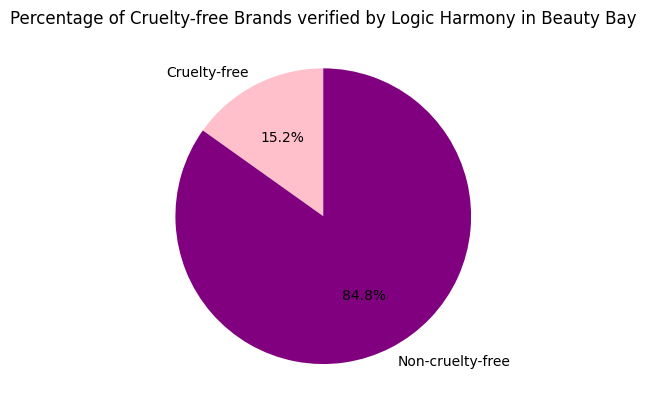

In [22]:
# Count the number of cruelty-free and non-cruelty-free brands
num_cruelty_free = len(cruelty_free_beautybay_df)
num_non_cruelty_free = len(all_brands_beautybay_df) - num_cruelty_free

# Create a list of values and labels for the pie chart
values = [num_cruelty_free, num_non_cruelty_free]
labels = ['Cruelty-free', 'Non-cruelty-free']

# Set the color for each section of the pie chart
colors = ['pink', 'purple']

# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage of Cruelty-free Brands verified by Logic Harmony in Beauty Bay')

# Show the pie chart
plt.show()

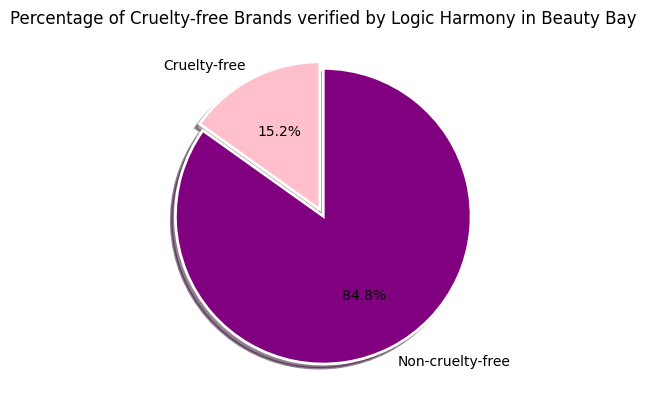

In [23]:
# Create the pie chart with additional arguments
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.05, 0), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a title to the pie chart
plt.title('Percentage of Cruelty-free Brands verified by Logic Harmony in Beauty Bay')

# Show the pie chart
plt.show()


In [24]:

# html = """<div class="desktop-menu-content__column brand-search-column">...</div>"""

# soup = BeautifulSoup(html, 'html.parser')

# brand_items = soup.find_all('a', class_='brand-item')

# brand_names = [item.text.strip() for item in brand_items]

# for brand in brand_names:
#     print(brand)
    

In [25]:
print(len(brands))

264


In [26]:

# # Load data from CSV
# all_brands_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv')

# # Clean up the 'Brand_info' column and extract brand names
# all_brands_beautybay_df['Brand_info'] = all_brands_beautybay_df['Brand_info'].str.extract('>(.*?)<')
# all_brands_beautybay_df['Brand_info'] = all_brands_beautybay_df['Brand_info'].str.strip()

# all_brands_beautybay_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv', index=False)
# # Display the cleaned DataFrame
# print(all_brands_beautybay_df.head(30))

In [27]:
all_brands_beautybay_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_sephora.csv', index=False)
# Display the cleaned DataFrame
print(all_brands_beautybay_df.head(30))

                 Brand_info
0                about-face
1                    Acnemy
2                     Aēsop
3            Allies of Skin
4   Anastasia Beverly Hills
5             Ariana Grande
6                   As I Am
7                     Aśani
8            Aurelia London
9                     Avène
10            Babe Original
11                 BaByliss
12             Babyliss Pro
13                     Bala
14            Bare By Vogue
15            Beauty Cooler
16             Beauty Works
17            beautyblender
18             Bed of Nails
19               Bellissima
20                    BeYou
21             BH Cosmetics
22            Bleach London
23                    Bliss
24              Bondi Sands
25                 bPerfect
26                  Briogeo
27              Brush Candy
28               Brushworks
29          Bubble Skincare


In [28]:


# Load data from CSV files
all_brands_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv')
cruelty_free_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_beautybay.csv')

# Extract brand names from each DataFrame and clean them
all_brands = all_brands_beautybay_df['Brand_info'].str.strip().str.lower().tolist()
cruelty_free_brands = cruelty_free_beautybay_df['Brand_info'].str.strip().str.lower().tolist()

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Brand_info': all_brands})
results_df['cruelty_free'] = results_df['Brand_info'].str.lower().isin(cruelty_free_brands)

# Print the results
print(results_df.head(270))

                  Brand_info  cruelty_free
0                 about-face         False
1                     acnemy         False
2                      aēsop         False
3             allies of skin         False
4    anastasia beverly hills          True
..                       ...           ...
259            xx revolution         False
260                   yes to          True
261               youthforia         False
262                zitsticka         False
263                    zoeva          True

[264 rows x 2 columns]


In [29]:
# Count the number of cruelty-free brands
num_cruelty_free_brands = results_df['cruelty_free'].sum()

# Print the number of cruelty-free brands
print("Number of cruelty-free brands:", num_cruelty_free_brands)


Number of cruelty-free brands: 11


In [30]:
# # Assuming you already have the 'html' variable containing the HTML content
# soup = BeautifulSoup(html, 'html.parser')

# # Find all the brand sections
# brand_sections = soup.find_all('div', class_='brand-section')

# # Initialize lists to store the extracted data
# brand_names = []
# brand_links = []

# # Extract the brand names and links from each brand section
# for section in brand_sections:
#     brand_items = section.find_all('a', class_='brand-item')
#     for item in brand_items:
#         brand_names.append(item.text)
#         brand_links.append(item['href'])




In [31]:
# # Load data from CSV files
# all_brands_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv')
# cruelty_free_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_beautybay.csv')

# # Merge the two data frames based on the 'Brand_info' column
# merged_df = pd.merge(all_brands_beautybay_df, cruelty_free_beautybay_df, on='Brand_info', how='inner')

# # Check if the same brands appear in both data frames
# if len(merged_df) > 0:
#     print("True")
# else:
#     print("False")
# # This code merges the two data frames based on the 'Brand_info' column using an inner join. If there are any common brands between the two data frames, the merged data frame will have rows, and it will print "True". Otherwise, if there are no common brands, it will print "False".


# # Print the combined dataframe


# print(merged_df)

In [32]:
# # Save the DataFrame as a CSV file
# all_brands_beautybay_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv', index=False)
# # Print the DataFrame
# all_brands_beautybay_df.head(30)

In [33]:
# Convert brand names to lowercase for case-insensitive comparison
all_brands_beautybay_df['Brand_info'] = all_brands_beautybay_df['Brand_info'].str.lower()
cruelty_free_beautybay_df['Brand_info'] = cruelty_free_beautybay_df['Brand_info'].str.lower()

# Check if brand names appear in both data frames
all_brands_beautybay_df['cruelty_free'] = all_brands_beautybay_df['Brand_info'].isin(cruelty_free_beautybay_df['Brand_info'])

# Calculate the number of cruelty-free brands out of all brands
num_cruelty_free_brands = all_brands_beautybay_df['cruelty_free'].sum()

# Calculate the percentage of cruelty-free brands out of all brands
percentage_cruelty_free = (num_cruelty_free_brands / len(all_brands_beautybay_df)) * 100

# Calculate the percentage of non-cruelty-free brands out of all brands
percentage_non_cruelty_free = 100 - percentage_cruelty_free

# Print the results
print(f"Number of cruelty-free brands out of all brands: {num_cruelty_free_brands}")
print(f"Percentage of cruelty-free brands out of all brands: {percentage_cruelty_free:.2f}%")
print(f"Percentage of non-cruelty-free brands out of all brands: {percentage_non_cruelty_free:.2f}%")


Number of cruelty-free brands out of all brands: 11
Percentage of cruelty-free brands out of all brands: 4.17%
Percentage of non-cruelty-free brands out of all brands: 95.83%


In [34]:
# # Load data from CSV files
# all_brands_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv')
# cruelty_free_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_beautybay.csv')

# # Check if brand names appear in both data frames
# all_brands_beautybay_df['cruelty_free'] = all_brands_beautybay_df['Brand_info'].isin(cruelty_free_beautybay_df['Brand_info'])

# # Calculate the number of cruelty-free brands
# num_cruelty_free_brands = all_brands_beautybay_df['cruelty_free'].sum()

# # Calculate the total number of brands
# num_total_brands = len(all_brands_beautybay_df)

# # Print the number of cruelty-free brands out of all brands
# print(f"Number of cruelty-free brands out of all brands: {num_cruelty_free_brands}/{num_total_brands}")

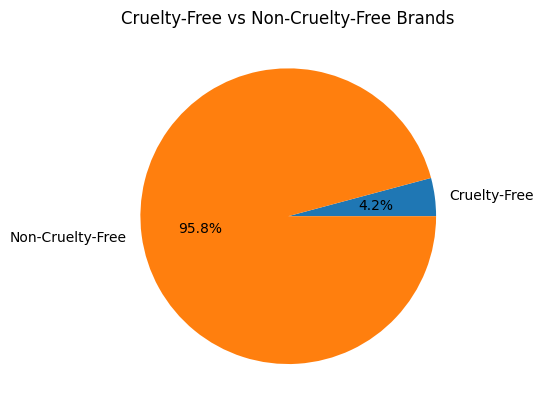

In [35]:


# Calculate the number of non-cruelty-free brands
num_non_cruelty_free_brands = len(all_brands_beautybay_df) - num_cruelty_free_brands

# Create a list of labels for the pie chart
labels = ['Cruelty-Free', 'Non-Cruelty-Free']

# Create a list of values for the pie chart
values = [num_cruelty_free_brands, num_non_cruelty_free_brands]

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Cruelty-Free vs Non-Cruelty-Free Brands')

# Display the pie chart
plt.show()


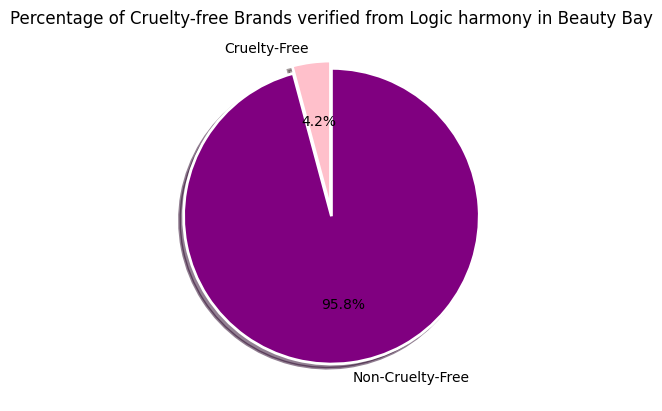

In [36]:
# Create the pie chart with additional arguments
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.05, 0), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a title to the pie chart
plt.title('Percentage of Cruelty-free Brands verified from Logic harmony in Beauty Bay')

# Show the pie chart
plt.show()

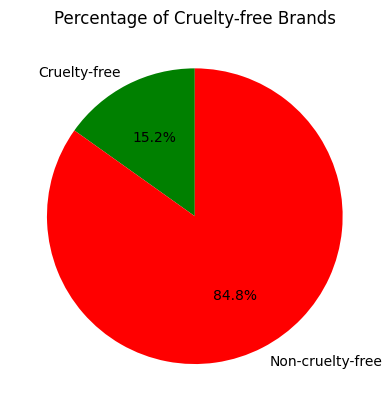

In [37]:
cruelty_free_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_beautybay.csv')

# Count the number of cruelty-free and non-cruelty-free brands
num_cruelty_free = len(cruelty_free_beautybay_df)
num_non_cruelty_free = len(all_brands_beautybay_df) - num_cruelty_free

# Create a list of values and labels for the pie chart
values = [num_cruelty_free, num_non_cruelty_free]
labels = ['Cruelty-free', 'Non-cruelty-free']

# Set the color for each section of the pie chart
colors = ['green', 'red']

# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage of Cruelty-free Brands')

# Show the pie chart
plt.show()

In [38]:
# Load data from CSV files
all_peta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_peta.csv')
all_brands_beautybay_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_beautybay.csv')

# Convert brand names to lowercase for case-insensitive comparison
all_peta_df['Brand_info'] = all_peta_df['Brand_info'].str.lower()
all_brands_beautybay_df['Brand_info'] = all_brands_beautybay_df['Brand_info'].str.lower()

# Check if brand names appear in both data frames
all_peta_df['cruelty_free'] = all_peta_df['Brand_info'].isin(all_brands_beautybay_df['Brand_info'])

# Calculate the number of cruelty-free brands out of all brands
num_cruelty_free_brands = all_peta_df['cruelty_free'].sum()

# Calculate the percentage of cruelty-free brands out of all brands
percentage_cruelty_free = (num_cruelty_free_brands / len(all_brands_beautybay_df)) * 100

# Calculate the percentage of non-cruelty-free brands out of all brands
percentage_non_cruelty_free = 100 - percentage_cruelty_free

# Print the results
print(f"Number of cruelty-free brands out of all brands: {num_cruelty_free_brands}")
print(f"Percentage of cruelty-free brands out of all brands: {percentage_cruelty_free:.2f}%")
print(f"Percentage of non-cruelty-free brands out of all brands: {percentage_non_cruelty_free:.2f}%")


Number of cruelty-free brands out of all brands: 52
Percentage of cruelty-free brands out of all brands: 19.70%
Percentage of non-cruelty-free brands out of all brands: 80.30%


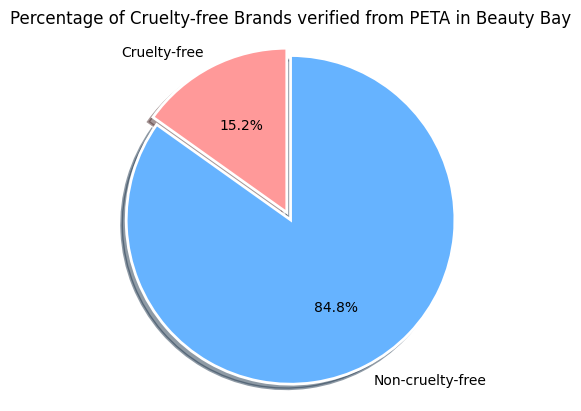

In [39]:
import matplotlib.pyplot as plt

# Define custom colors for the pie chart slices
colors = ['#ff9999', '#66b3ff']

# Create the pie chart with updated colors and additional arguments
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.05, 0), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a title to the pie chart
plt.title('Percentage of Cruelty-free Brands verified from PETA in Beauty Bay')

# Set the aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Show the pie chart
plt.show()

